In [1]:
import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad

import warnings

  
# Suppress implicit modification warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)  



/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata

In [2]:
import matplotlib

sc.settings.figdir = "fig1"
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(18,18),
                              vector_friendly=True
                             )
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered'

adata_5k=sc.read_h5ad(PATH)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"].copy()
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST


In [5]:
adata_5k.obs["Annotation"]=adata_5k.obs["lvl5_annotation"]
#[x  for x in adata_5k.obs["Annotation"].unique() if x.startswith("KC_HF") ]


['KC_HF: ORS0',
 'KC_HF: Matrix',
 'KC_HF: HFSC',
 'KC_HF: IRS1',
 'KC_HF: ORS_cycling',
 'KC_HF: ORS2',
 'KC_HF: SPON2+',
 'KC_HF: ORS1',
 'KC_HF: ORS_junction',
 'KC_HF: IRS_Cuticle',
 'KC_HF: HS',
 'KC_HF: IRS0']

# fig 1b

# fig 1c

In [8]:
adata_5k.obs["test"] = [x if x.startswith("KC_HF") or  x.startswith("KC_Sebo")  or  x.startswith("Smooth")  or  x.startswith("F4")  or  x.startswith("Swea") else "Other" for x in adata_5k.obs["Annotation"]]



In [9]:
import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

with open(file_path, 'rb') as file:
    palette_dict = pickle.load(file)

 

In [11]:
fallback = "#BFBFBF"

# make column categorical (once)
adata_5k.obs["test"] = adata_5k.obs["test"].astype("category")

cat_order   = list(adata_5k.obs["test"].cat.categories)
palette_vec = [palette_dict.get(c, fallback) for c in cat_order]   # list, not dict
adata_5k.uns["test_colors"] = palette_vec


 

In [24]:
adata_hair = adata_5k[adata_5k.obs["Sanger patient ID"]=="BK30"]
adata_hair
adata_hair = adata_hair[adata_hair.obs["Timepoint"]=="Day 14_HF"].copy()



fallback = "#BFBFBF"

adata_hair.obs["test"] = adata_hair.obs["test"].astype("category")
cat_order   = list(adata_hair.obs["test"].cat.categories)
palette_vec = [palette_dict.get(c, fallback) for c in cat_order]   
adata_hair.uns["test_colors"] = palette_vec

 

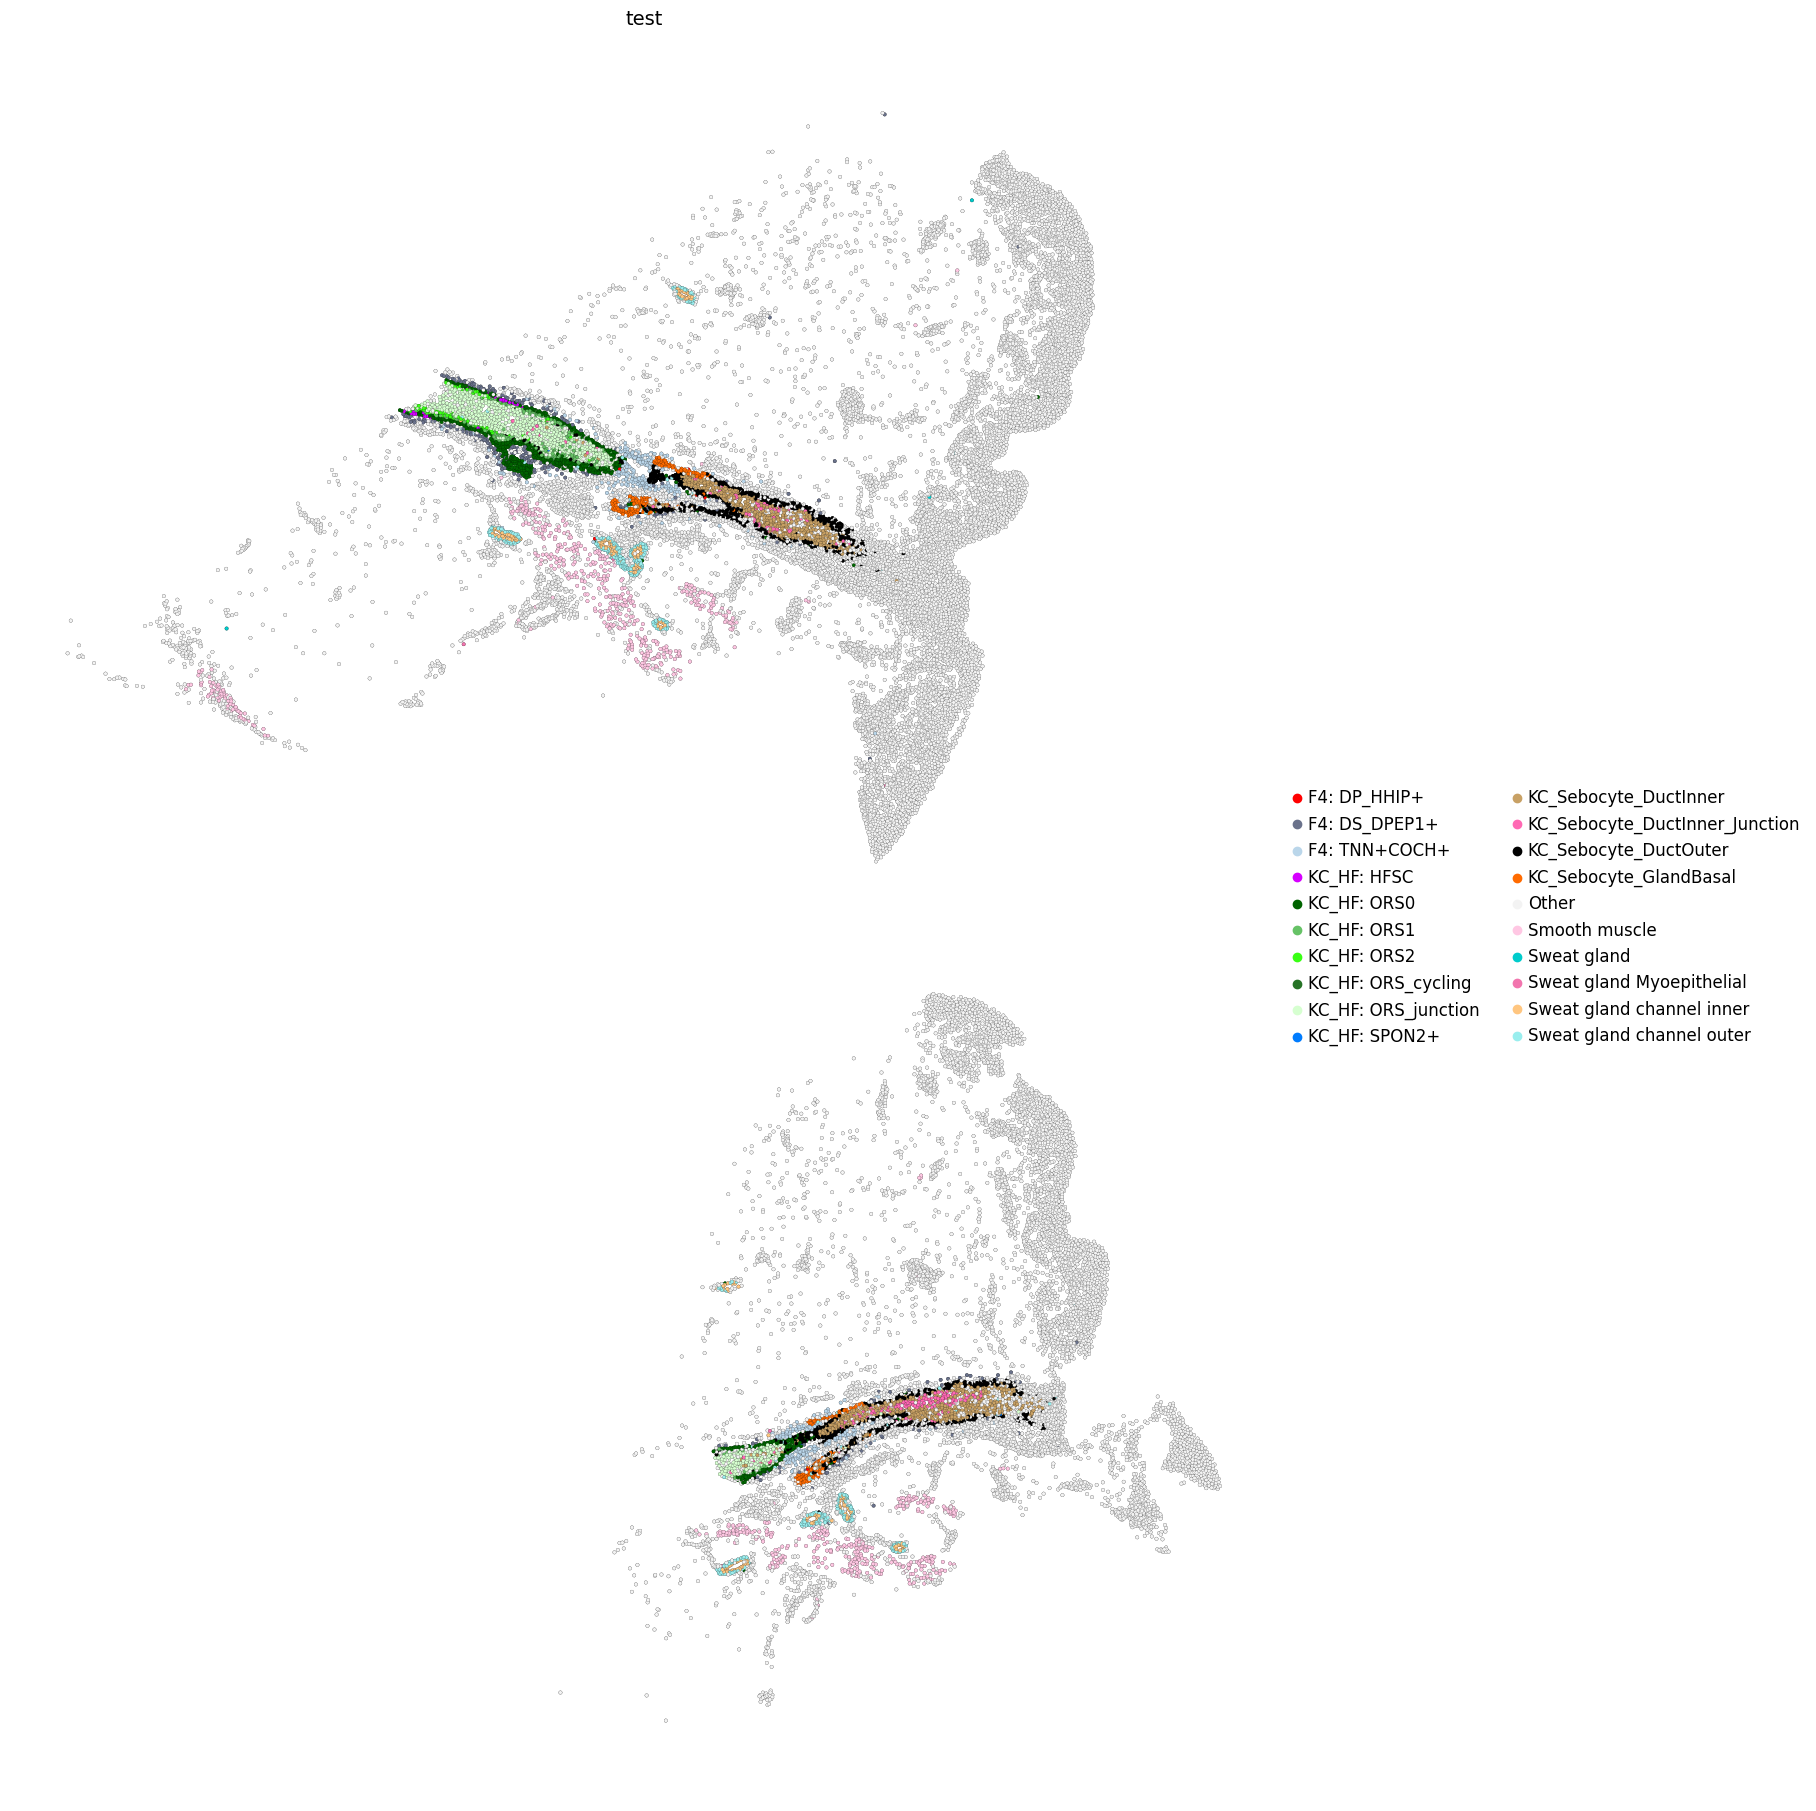

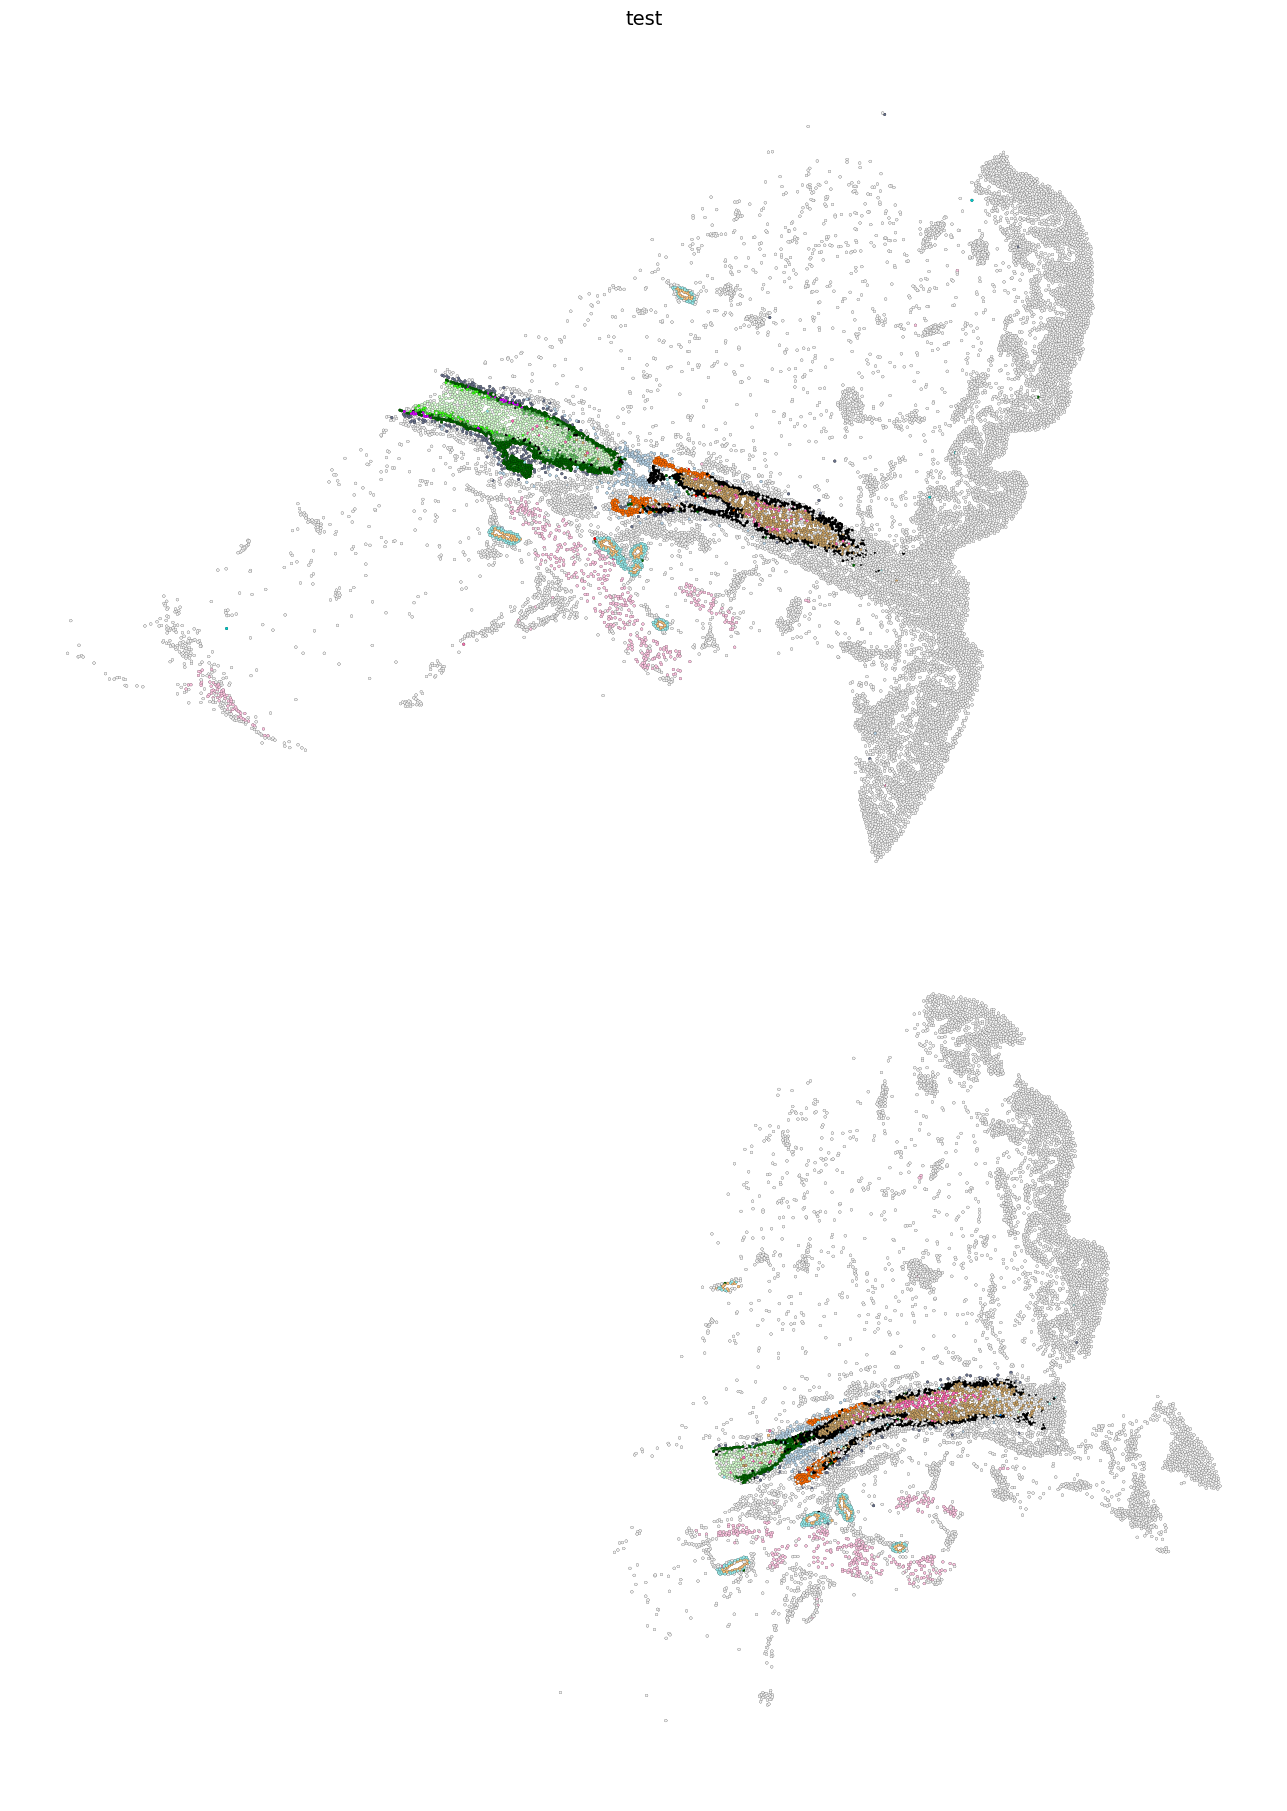

In [25]:
sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="test",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche_legend.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#     if i>1:
#         break

sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="test",
    size=15,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
   legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#    

BK43_Never Lesional
BK30_Week 12
Week 8 (resolved)_CE5-SKI-27-FO-4-S22-E1
Week 8 (resolved)_CE5-SKI-27-FO-4-S22_replicate
fail with:  Week 8 (resolved)_CE5-SKI-27-FO-4-S22_replicate 73


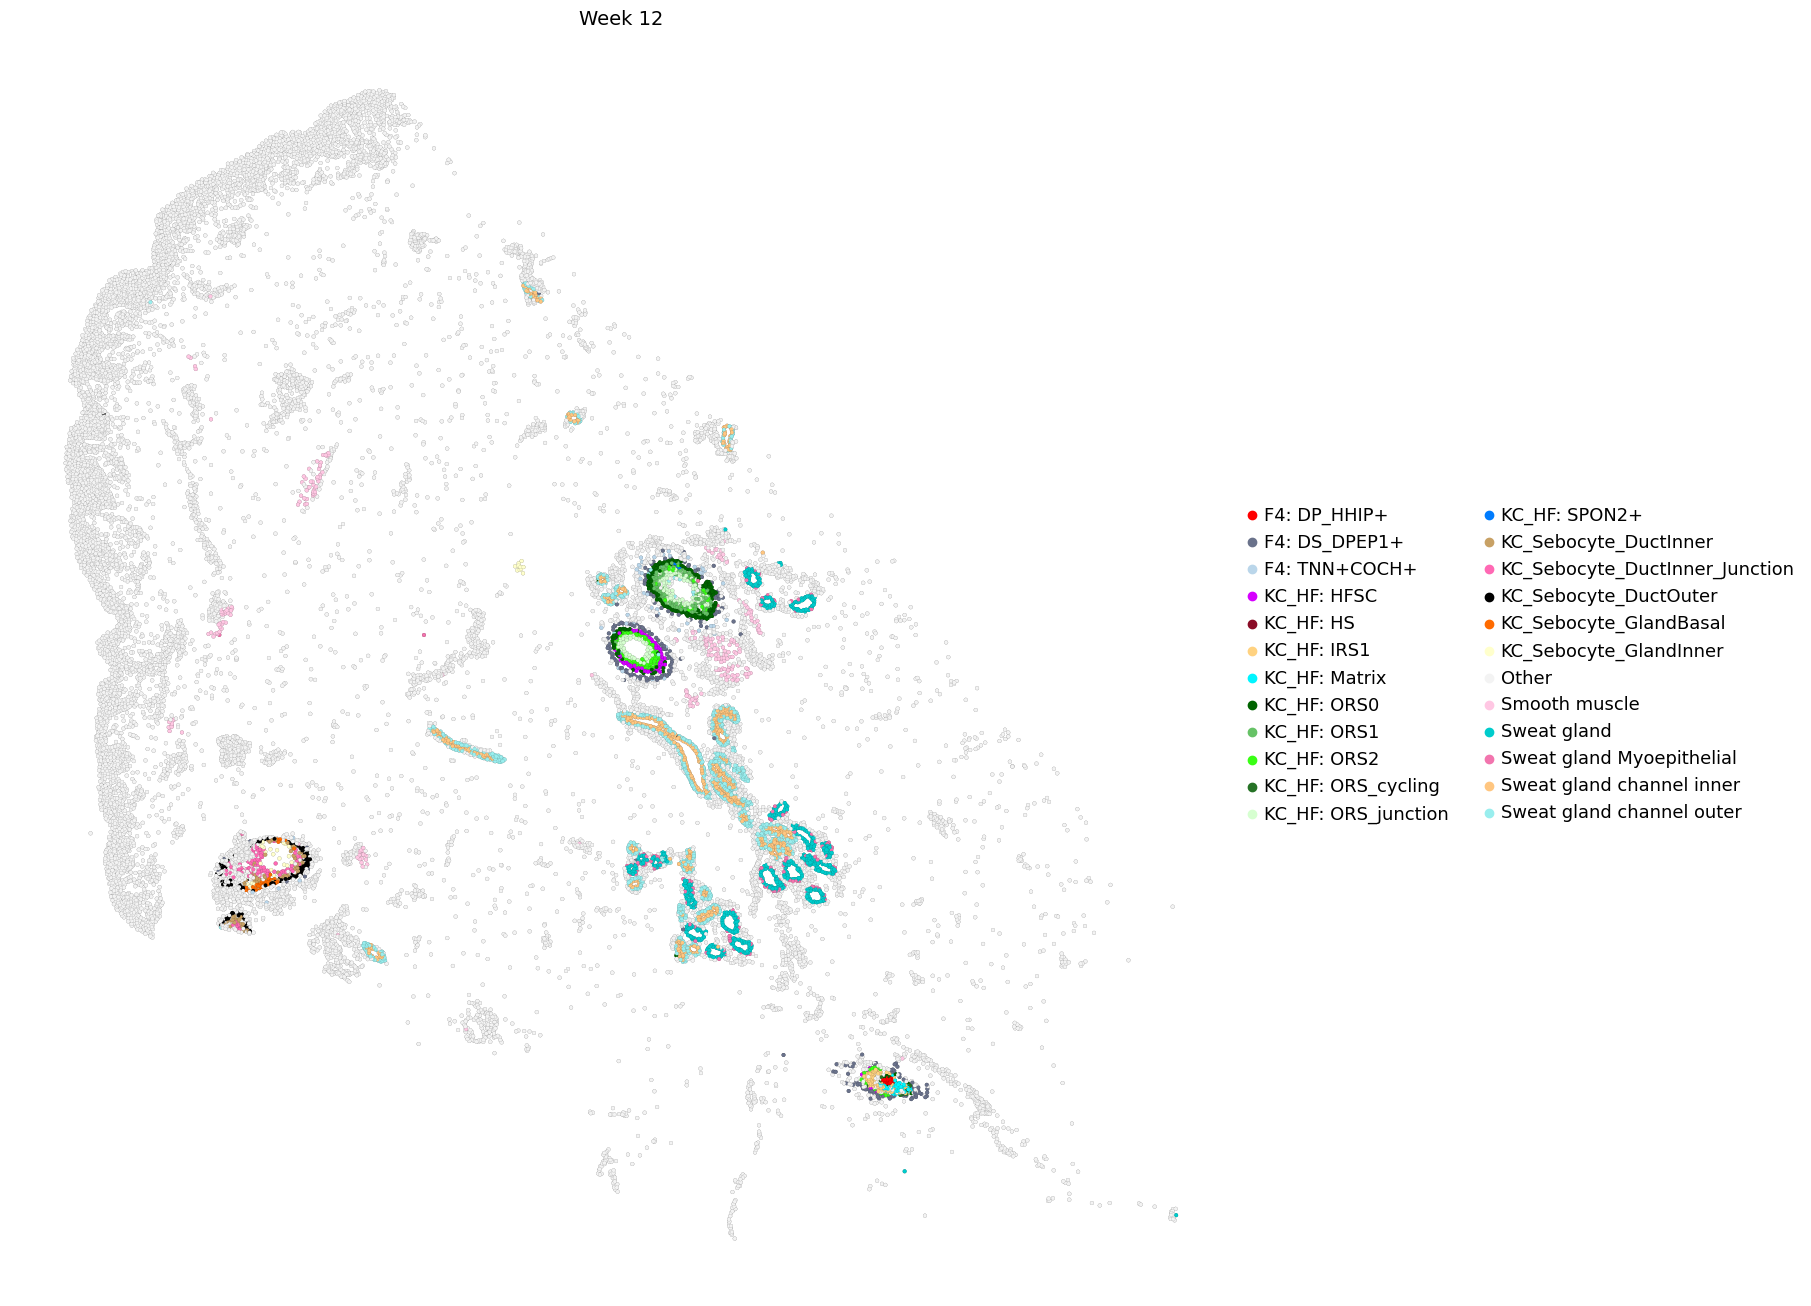

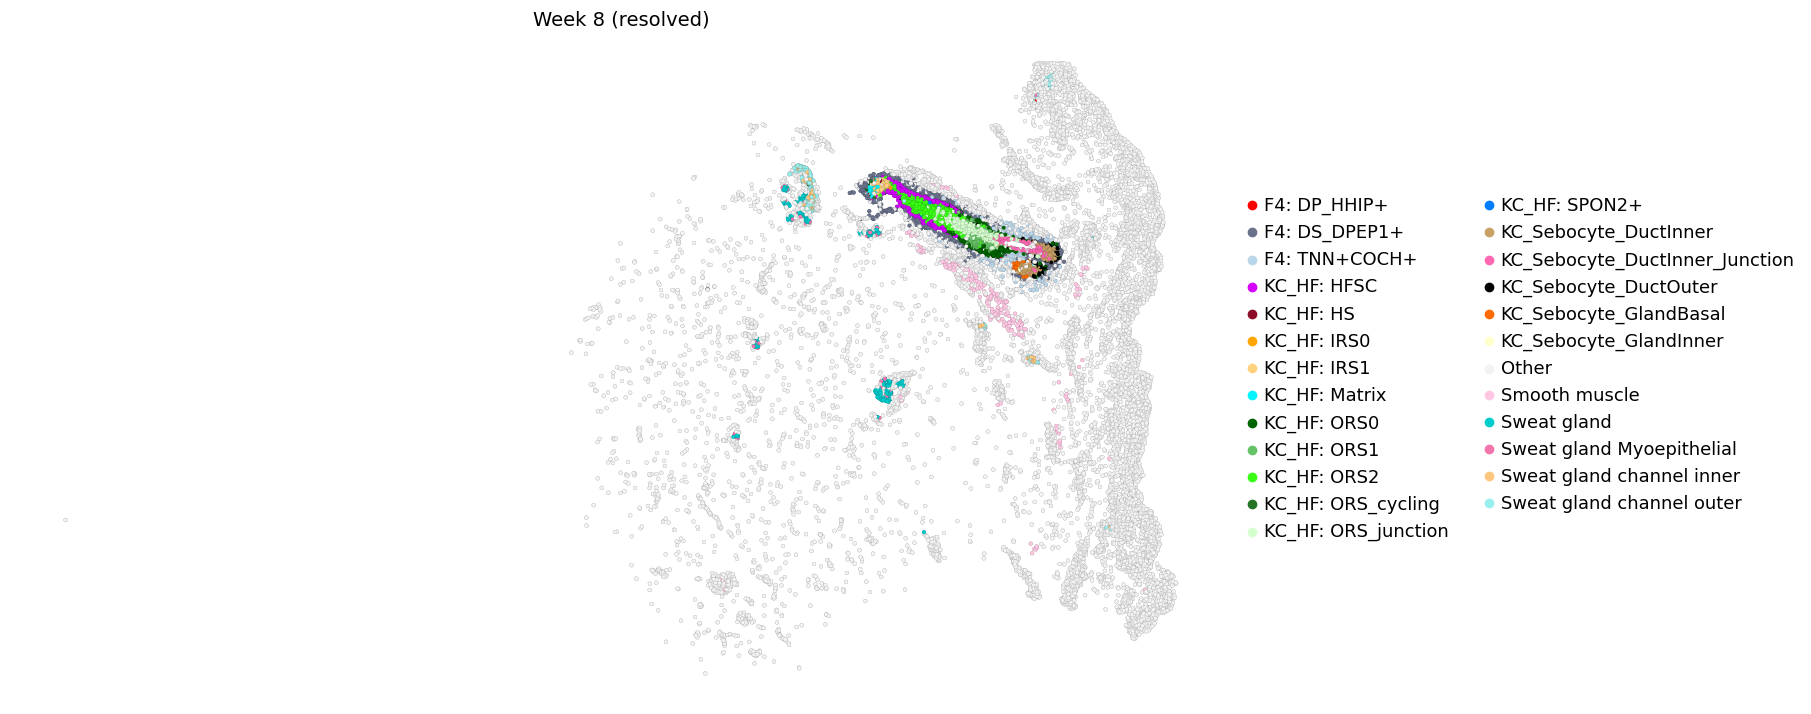

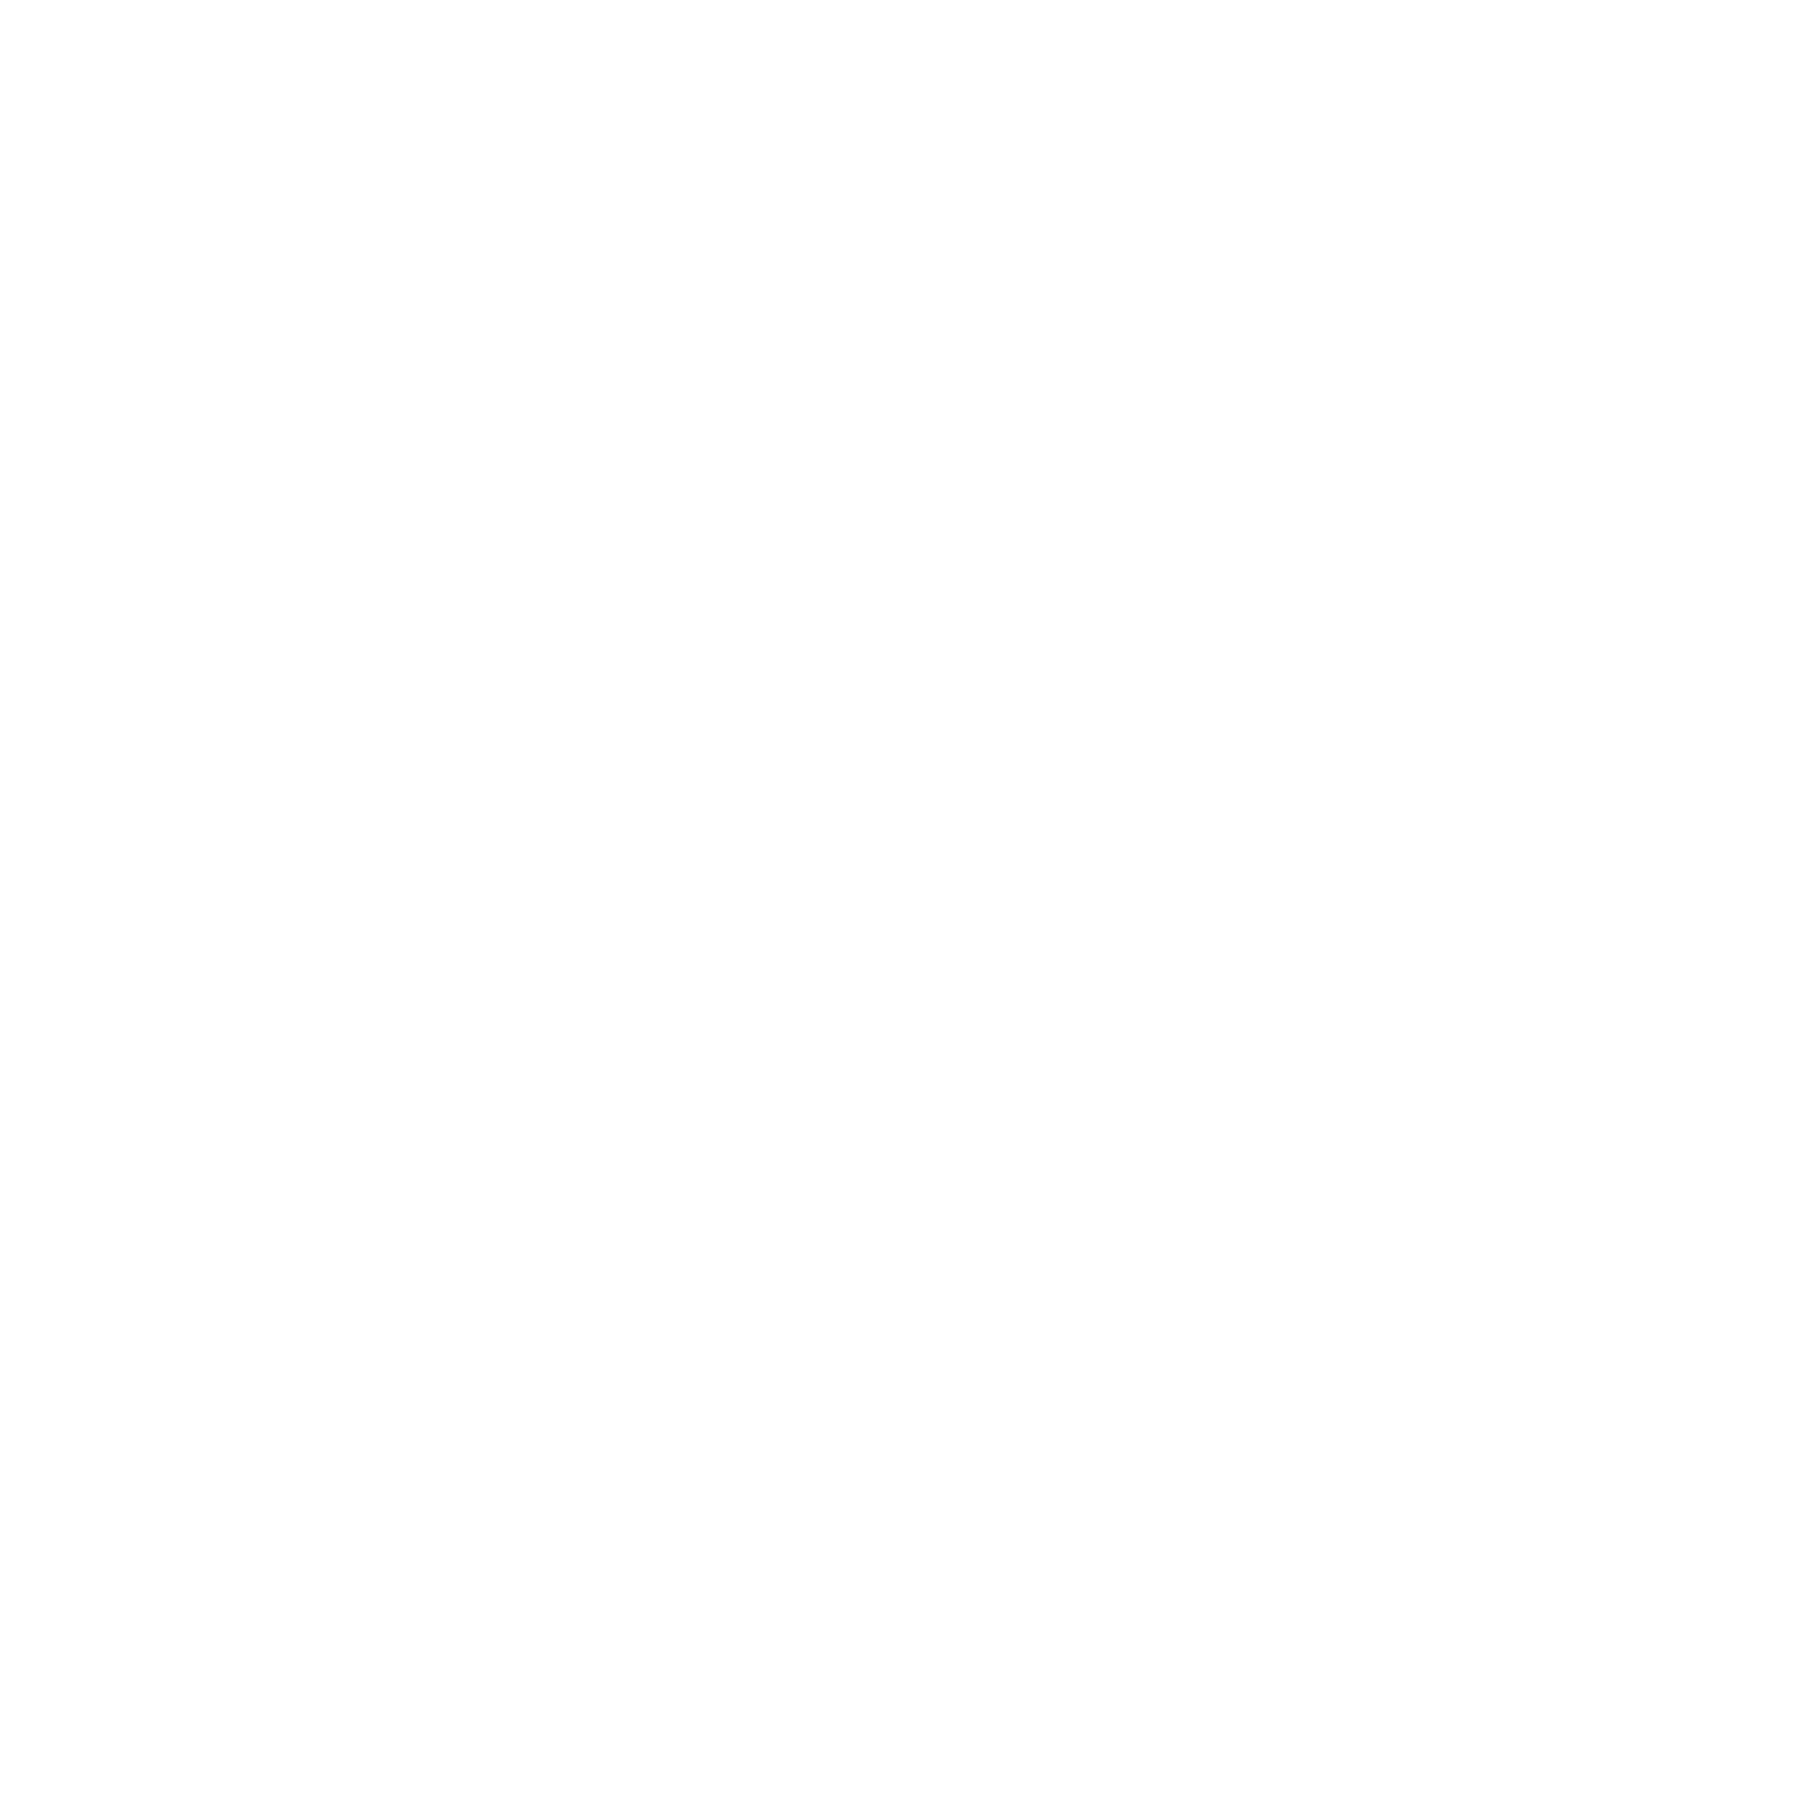

In [47]:
CELL_TYPE        = "KC_HF: Matrix"#'KC_HF: IRS_Cuticle'# # 'KC_HF: ORS-Bulb/infundibulum'
MIN_CELL_COUNT   = 40

for sec in adata_5k.obs["info_id6"].unique():
    ad_i = adata_5k[adata_5k.obs["info_id6"] == sec]
    ad_i.obs["test"] = ad_i.obs["test"].astype("category")

    cat_order   = list(ad_i.obs["test"].cat.categories)
    palette_vec = [palette_dict.get(c, fallback) for c in cat_order]   # list, not dict
    ad_i.uns["test_colors"] = palette_vec
    if CELL_TYPE not in ad_i.obs["test"].unique():
        continue
    n = (ad_i.obs["test"] == CELL_TYPE).sum()
    if n < MIN_CELL_COUNT:
        continue

    #STATUS = ad_i.obs["Timepoint"].iloc[0]
    #tissue_section_id = ad_i.obs["info_id6"].iloc[0]
    #print(tissue_section_id)
    try:
        sq.pl.spatial_scatter(
                        ad_i,
                        library_id="spatial",
                        shape=None,
                        color="test",
                        size=30,
                        edgecolor="black",
                        linewidth=0.05,
                        vmax=1,
                        title=sec ,# "\n" + tissue_section_id,
                       # palette=cmap,

                        #ax=ax,
                        #legend_loc="on data"  # Disable the legend for each subplot
                )
    except:
        print("fail with: ", sec, n)

    
    

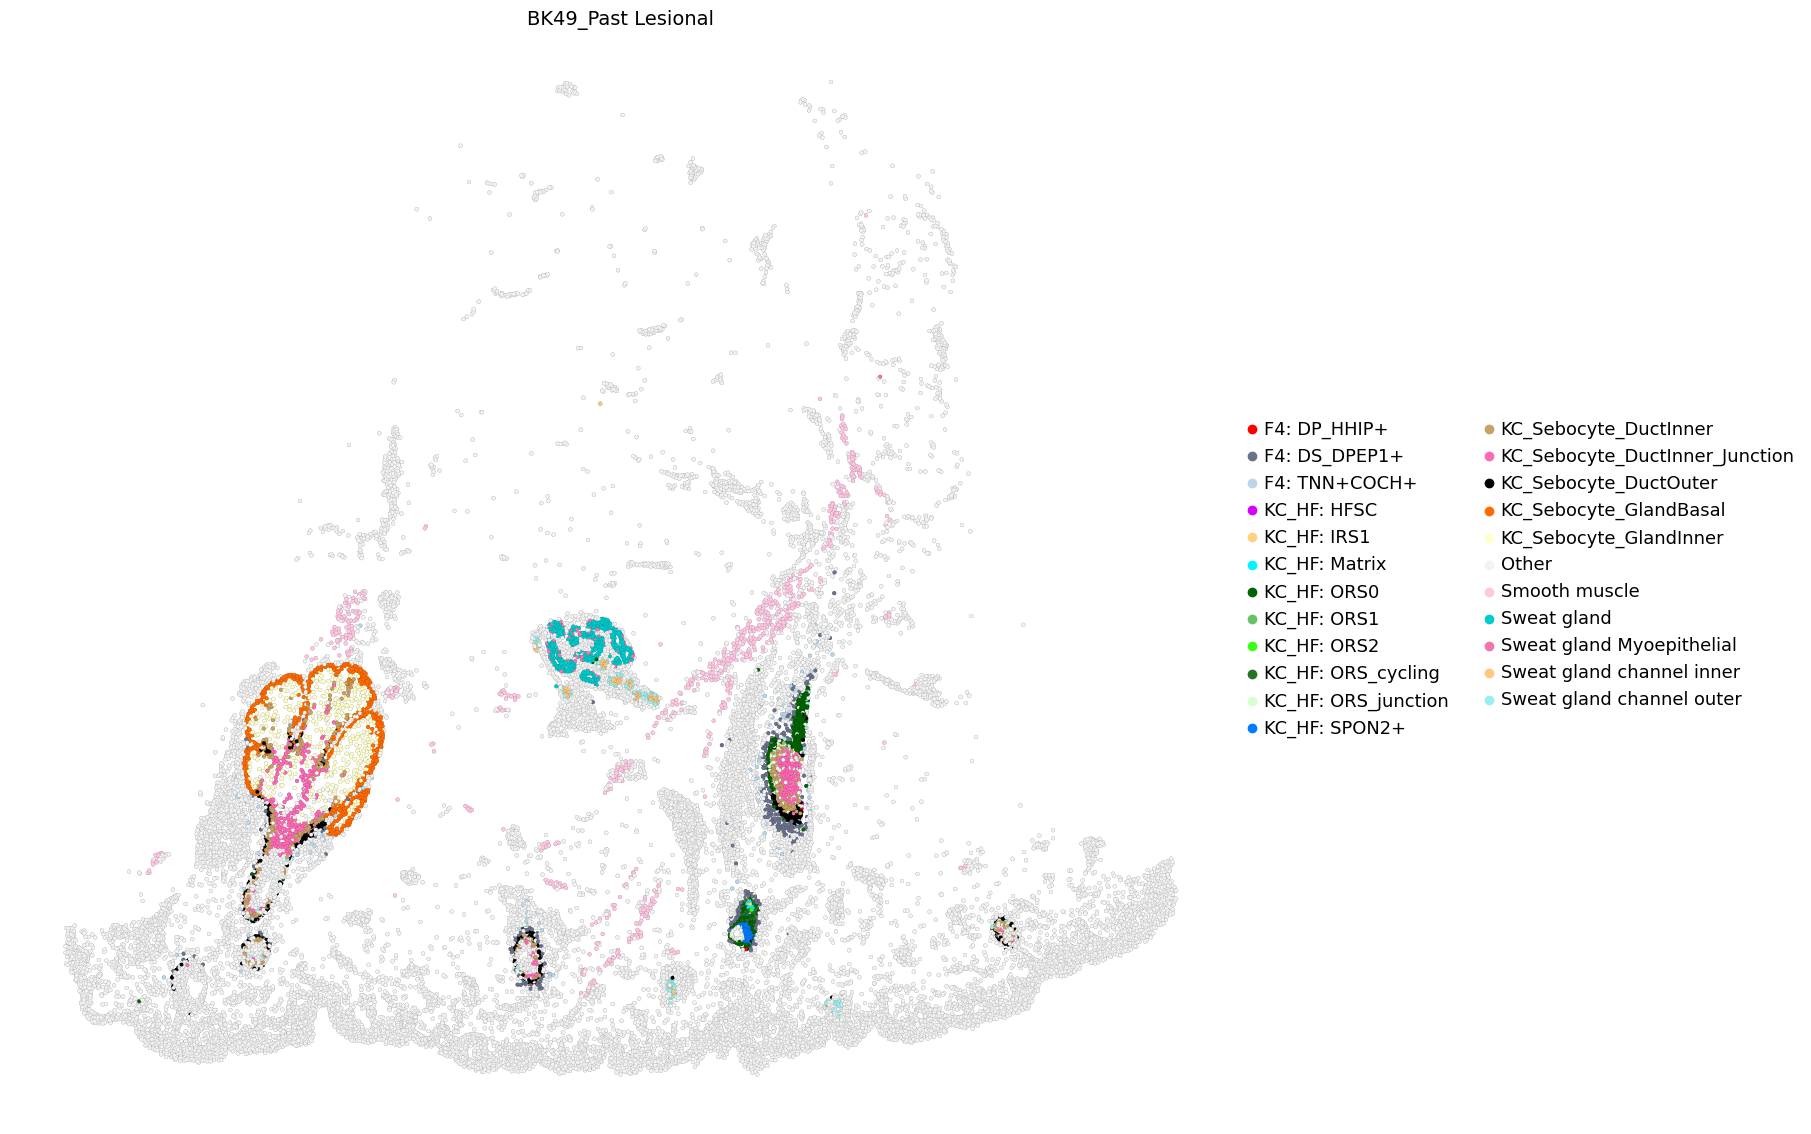

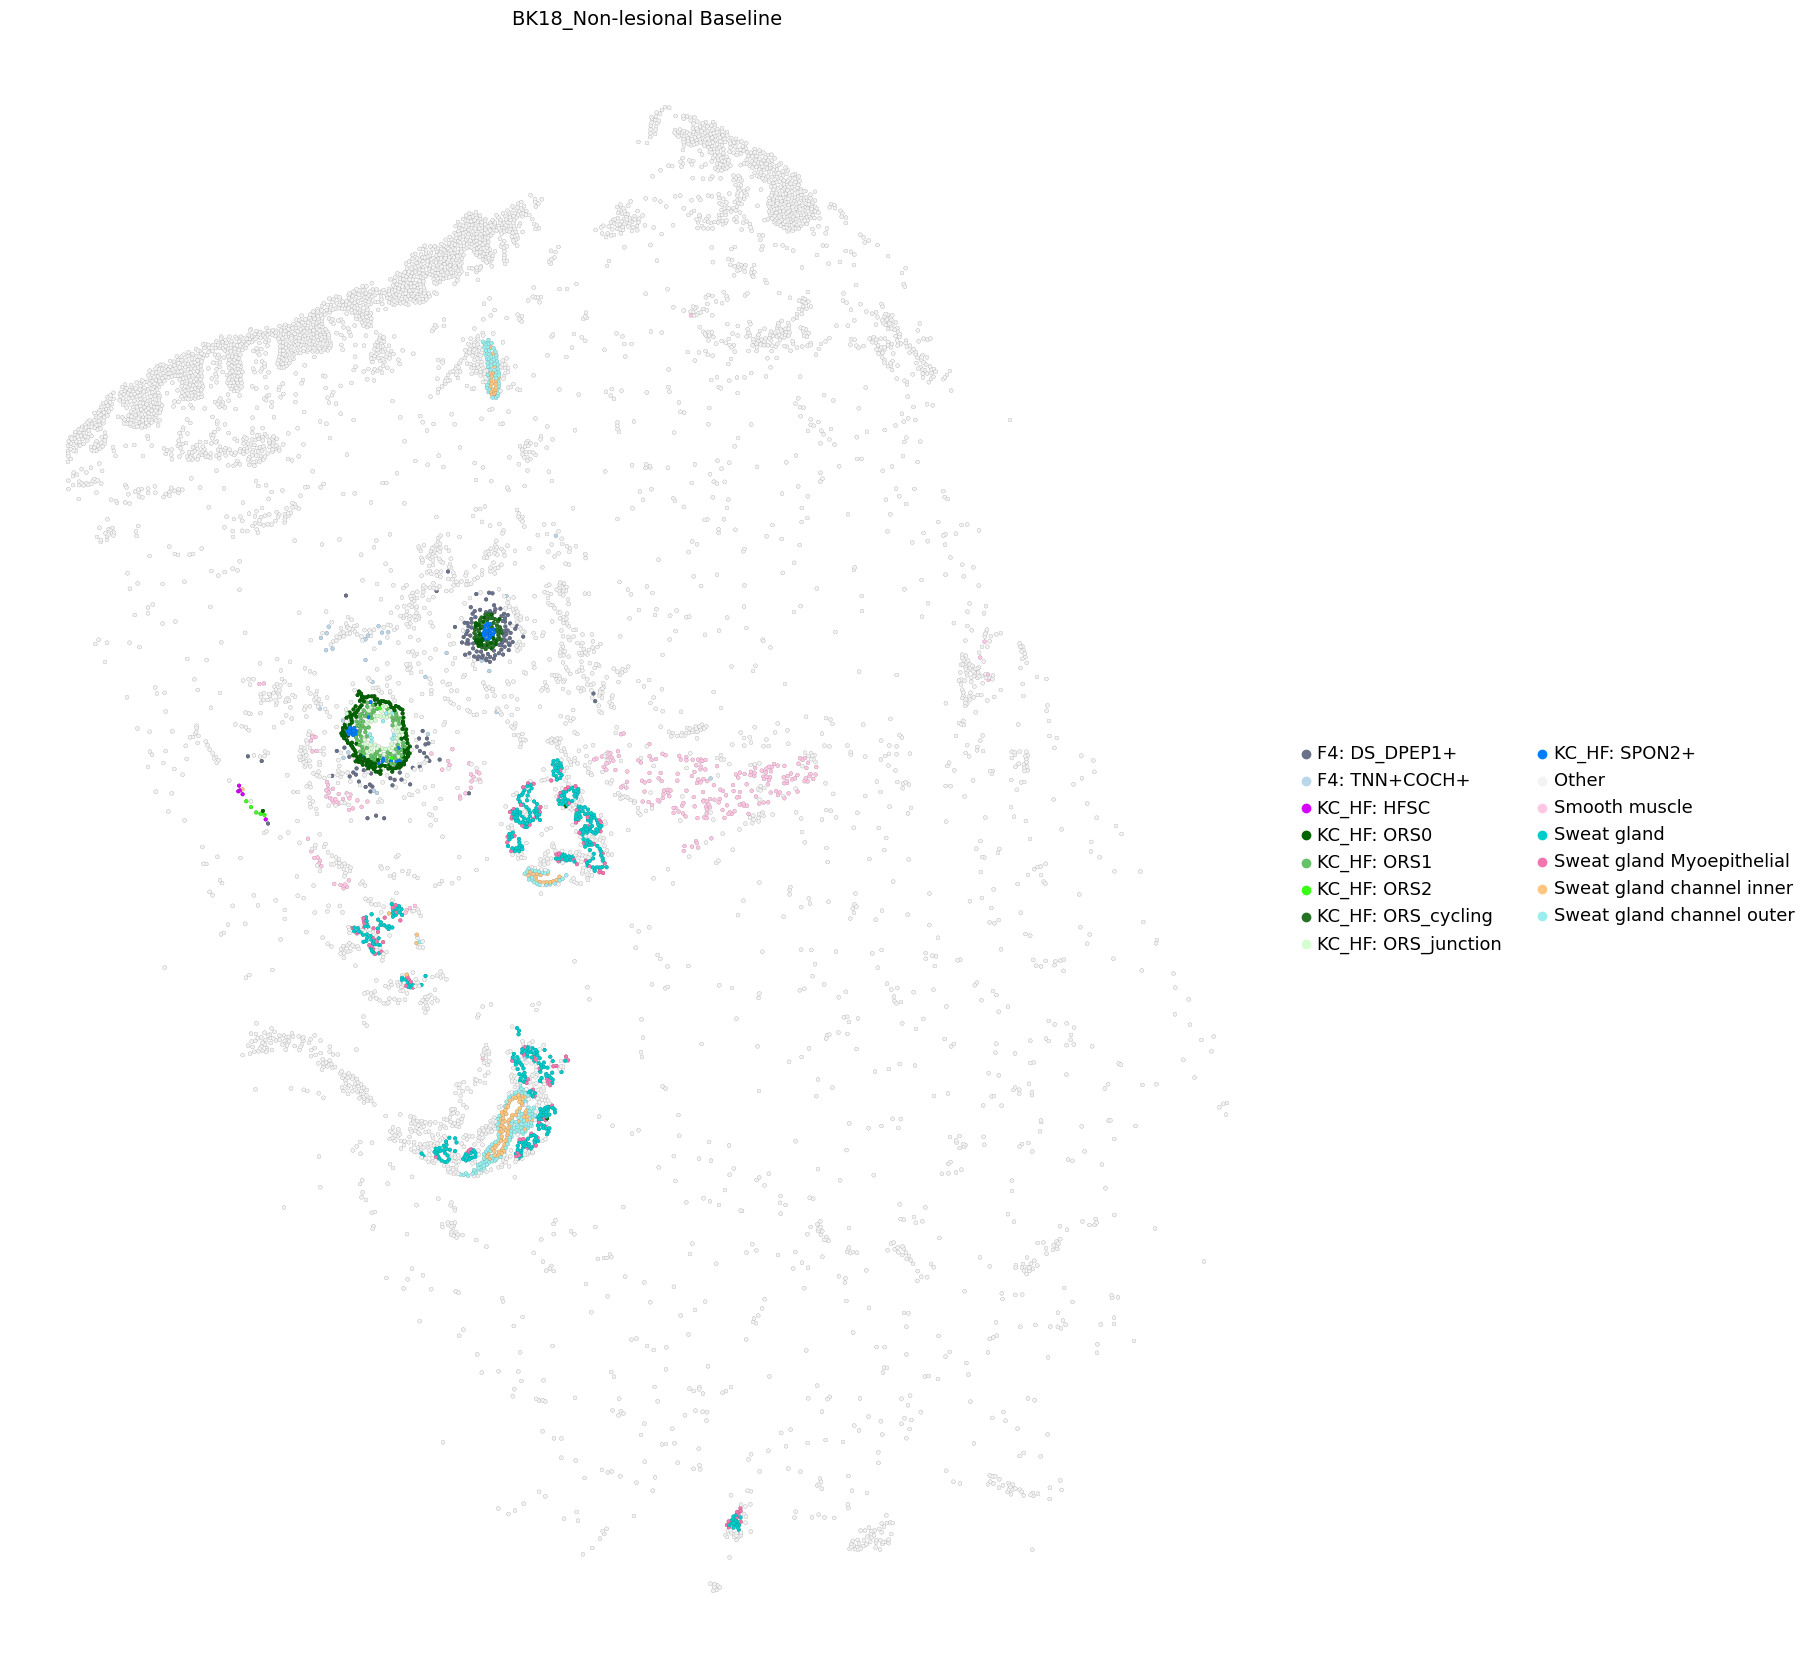

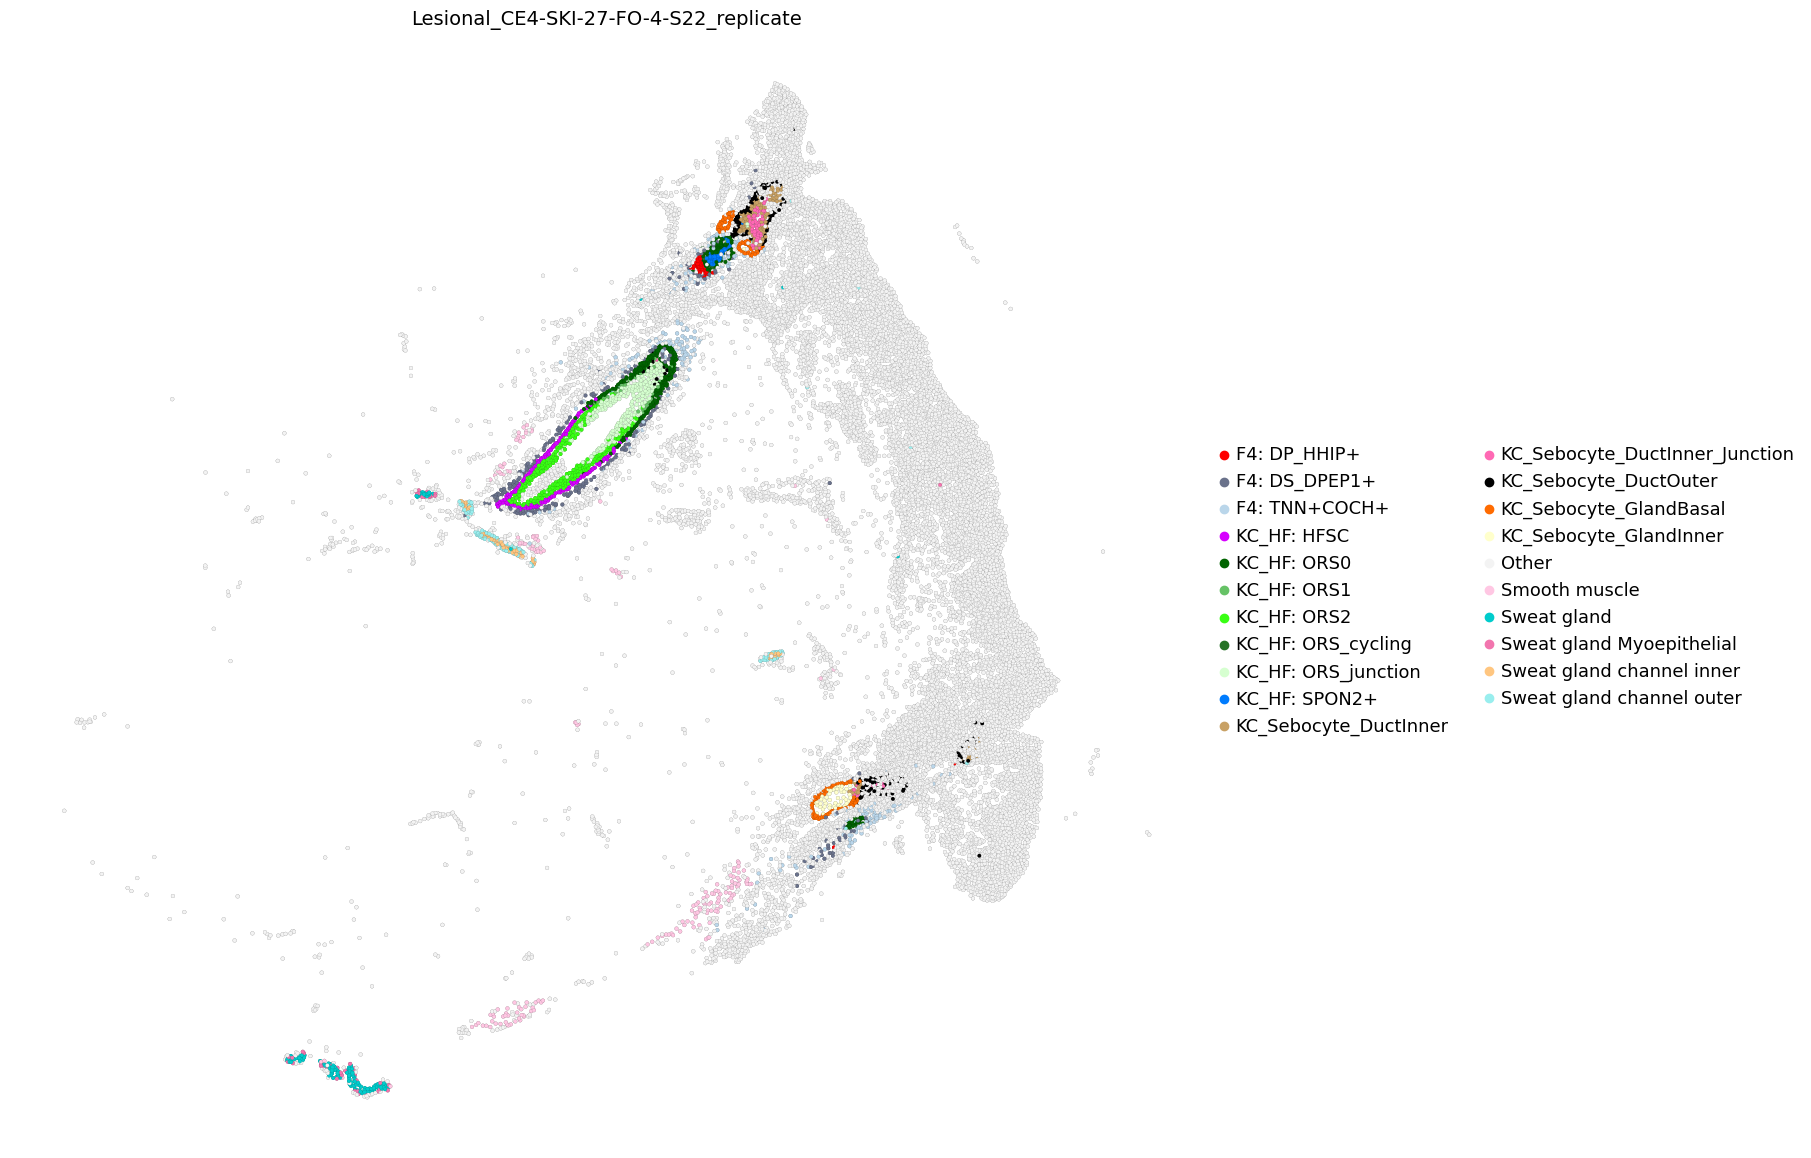

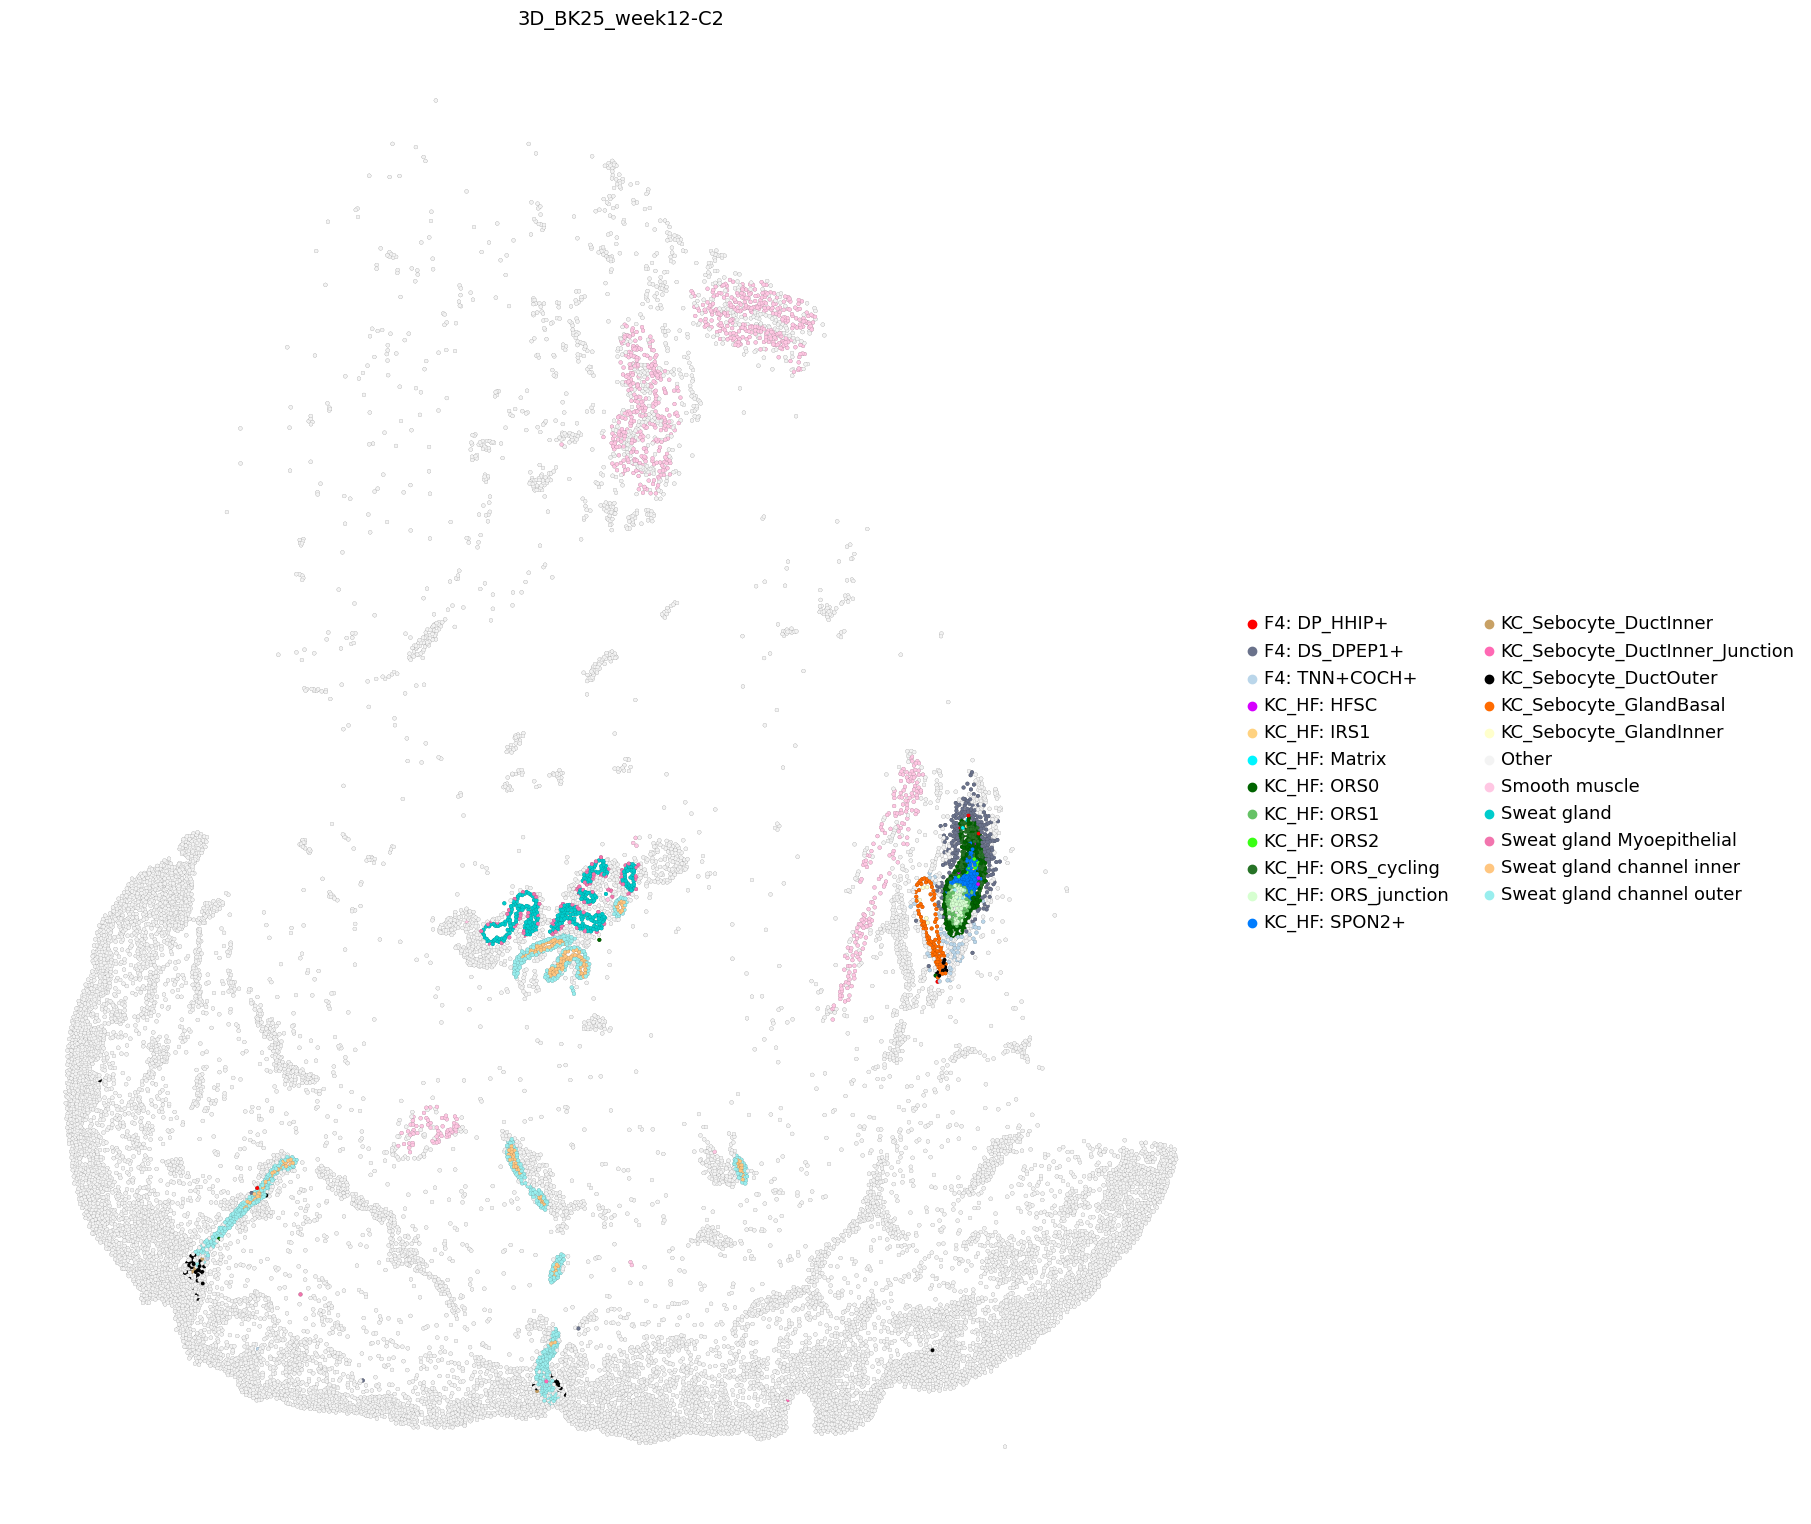

In [48]:
CELL_TYPE        ="KC_HF: SPON2+"#'KC_HF: IRS_Cuticle'# # 'KC_HF: ORS-Bulb/infundibulum'
MIN_CELL_COUNT   = 40

for sec in adata_5k.obs["info_id6"].unique():
    ad_i = adata_5k[adata_5k.obs["info_id6"] == sec]
    ad_i.obs["test"] = ad_i.obs["test"].astype("category")

    cat_order   = list(ad_i.obs["test"].cat.categories)
    palette_vec = [palette_dict.get(c, fallback) for c in cat_order]   # list, not dict
    ad_i.uns["test_colors"] = palette_vec
    if CELL_TYPE not in ad_i.obs["test"].unique():
        continue
    n = (ad_i.obs["test"] == CELL_TYPE).sum()
    if n < MIN_CELL_COUNT:
        continue

    #STATUS = ad_i.obs["Timepoint"].iloc[0]
    #tissue_section_id = ad_i.obs["info_id6"].iloc[0]
    #print(tissue_section_id)
    try:
        sq.pl.spatial_scatter(
                        ad_i,
                        library_id="spatial",
                        shape=None,
                        color="test",
                        size=30,
                        edgecolor="black",
                        linewidth=0.05,
                        vmax=1,
                        title=sec ,# "\n" + tissue_section_id,
                       # palette=cmap,

                        #ax=ax,
                        #legend_loc="on data"  # Disable the legend for each subplot
                )
    except:
        print("fail with: ", sec, n)

    
    

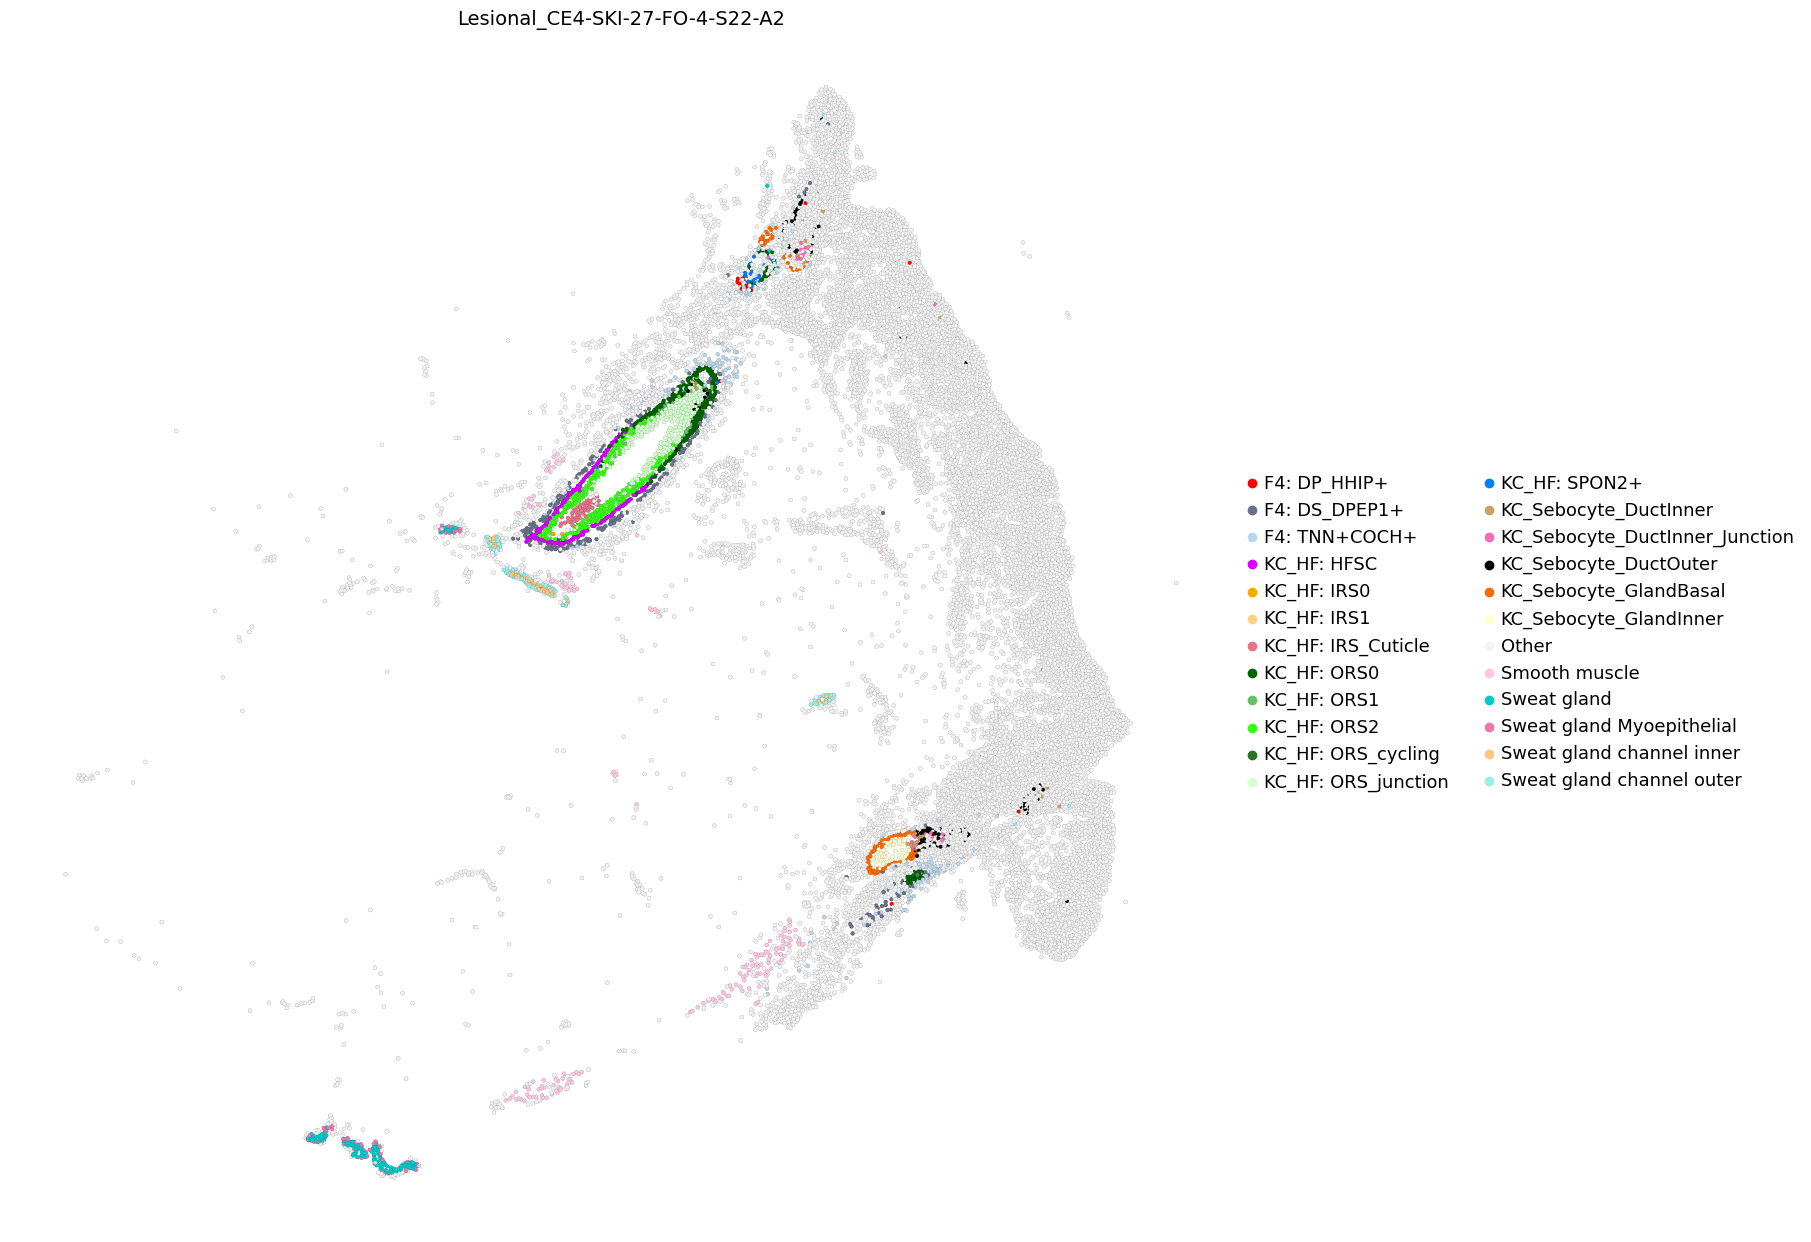

In [49]:
CELL_TYPE        ="KC_HF: IRS_Cuticle"#'KC_HF: IRS_Cuticle'# # 'KC_HF: ORS-Bulb/infundibulum'
MIN_CELL_COUNT   = 10

for sec in adata_5k.obs["info_id6"].unique():
    ad_i = adata_5k[adata_5k.obs["info_id6"] == sec]
    ad_i.obs["test"] = ad_i.obs["test"].astype("category")

    cat_order   = list(ad_i.obs["test"].cat.categories)
    palette_vec = [palette_dict.get(c, fallback) for c in cat_order]   # list, not dict
    ad_i.uns["test_colors"] = palette_vec
    if CELL_TYPE not in ad_i.obs["test"].unique():
        continue
    n = (ad_i.obs["test"] == CELL_TYPE).sum()
    if n < MIN_CELL_COUNT:
        continue

    #STATUS = ad_i.obs["Timepoint"].iloc[0]
    #tissue_section_id = ad_i.obs["info_id6"].iloc[0]
    #print(tissue_section_id)
    try:
        sq.pl.spatial_scatter(
                        ad_i,
                        library_id="spatial",
                        shape=None,
                        color="test",
                        size=20,
                        edgecolor="black",
                        linewidth=0.1,
                        vmax=1,
                        title=sec ,# "\n" + tissue_section_id,
                       # palette=cmap,

                        #ax=ax,
                        #legend_loc="on data"  # Disable the legend for each subplot
                )
    except:
        print("fail with: ", sec, n)

    
    

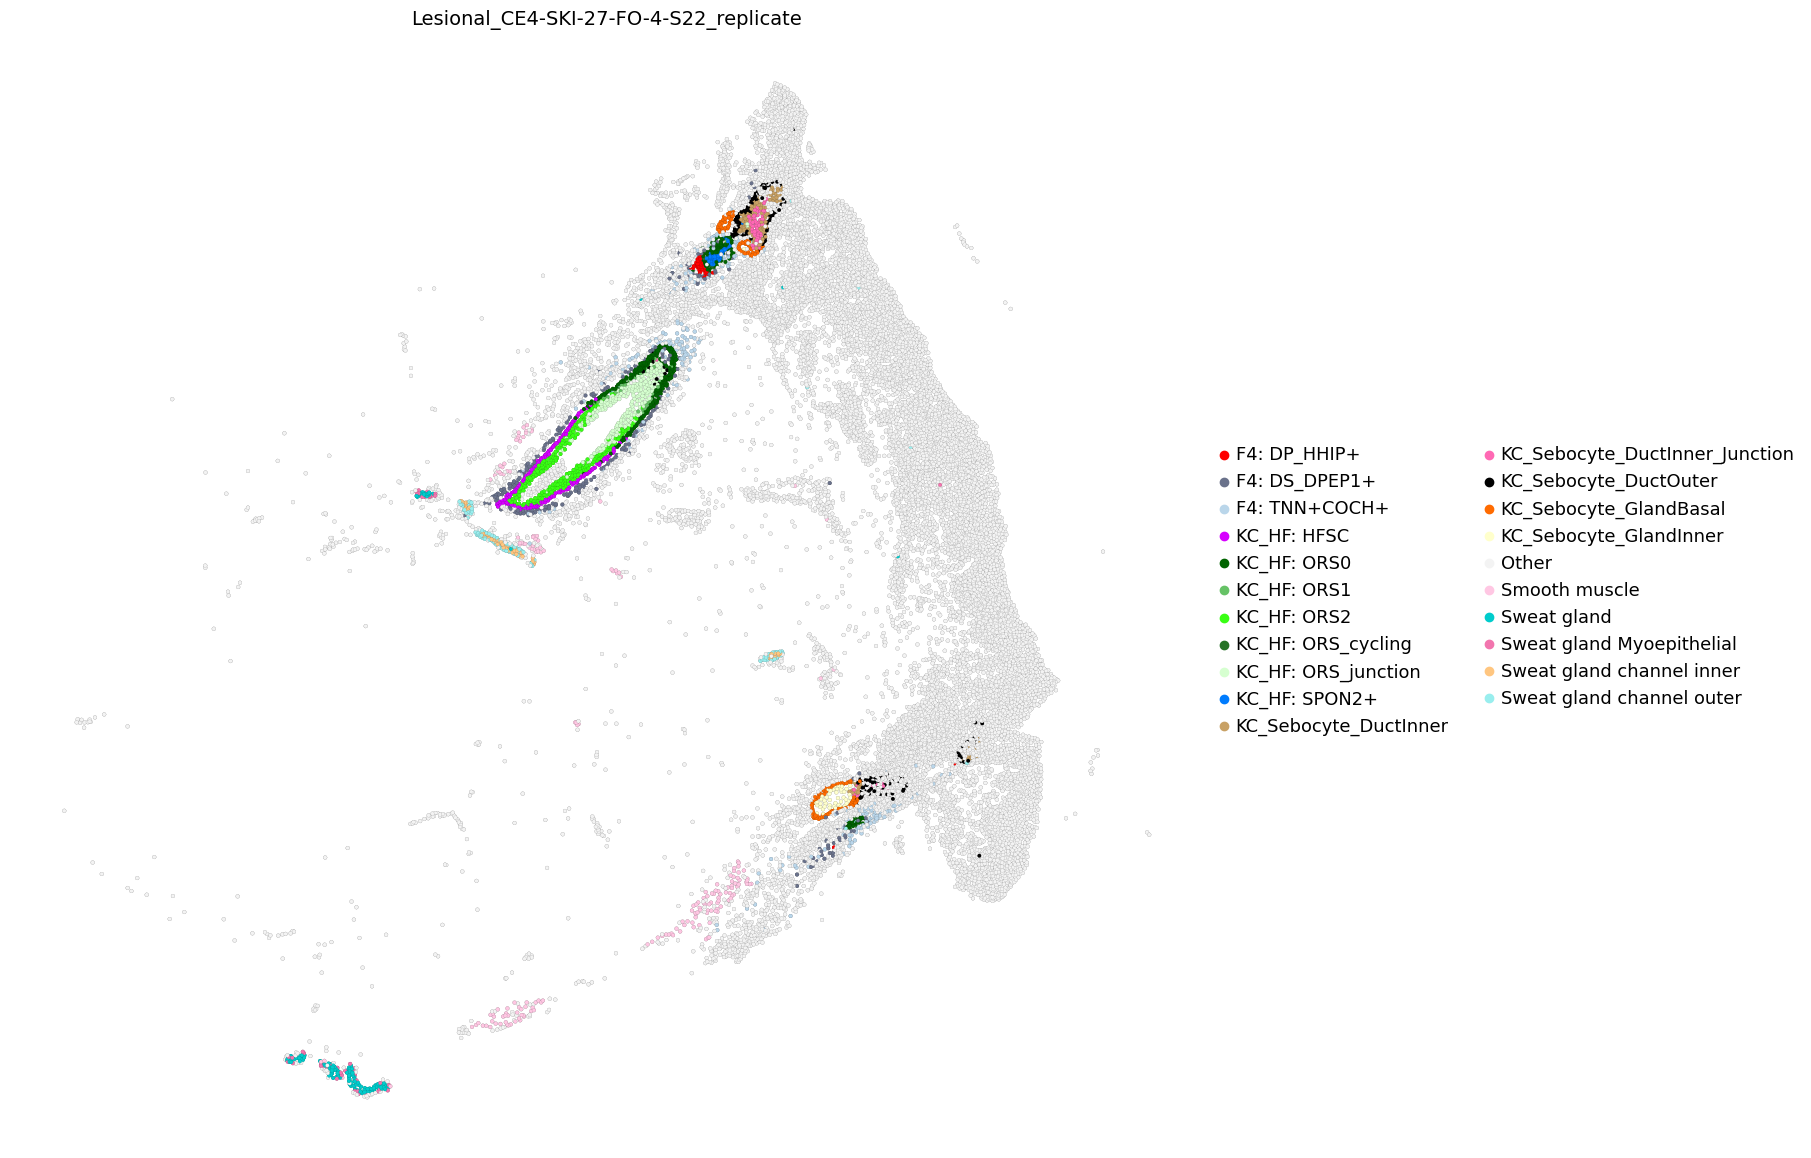

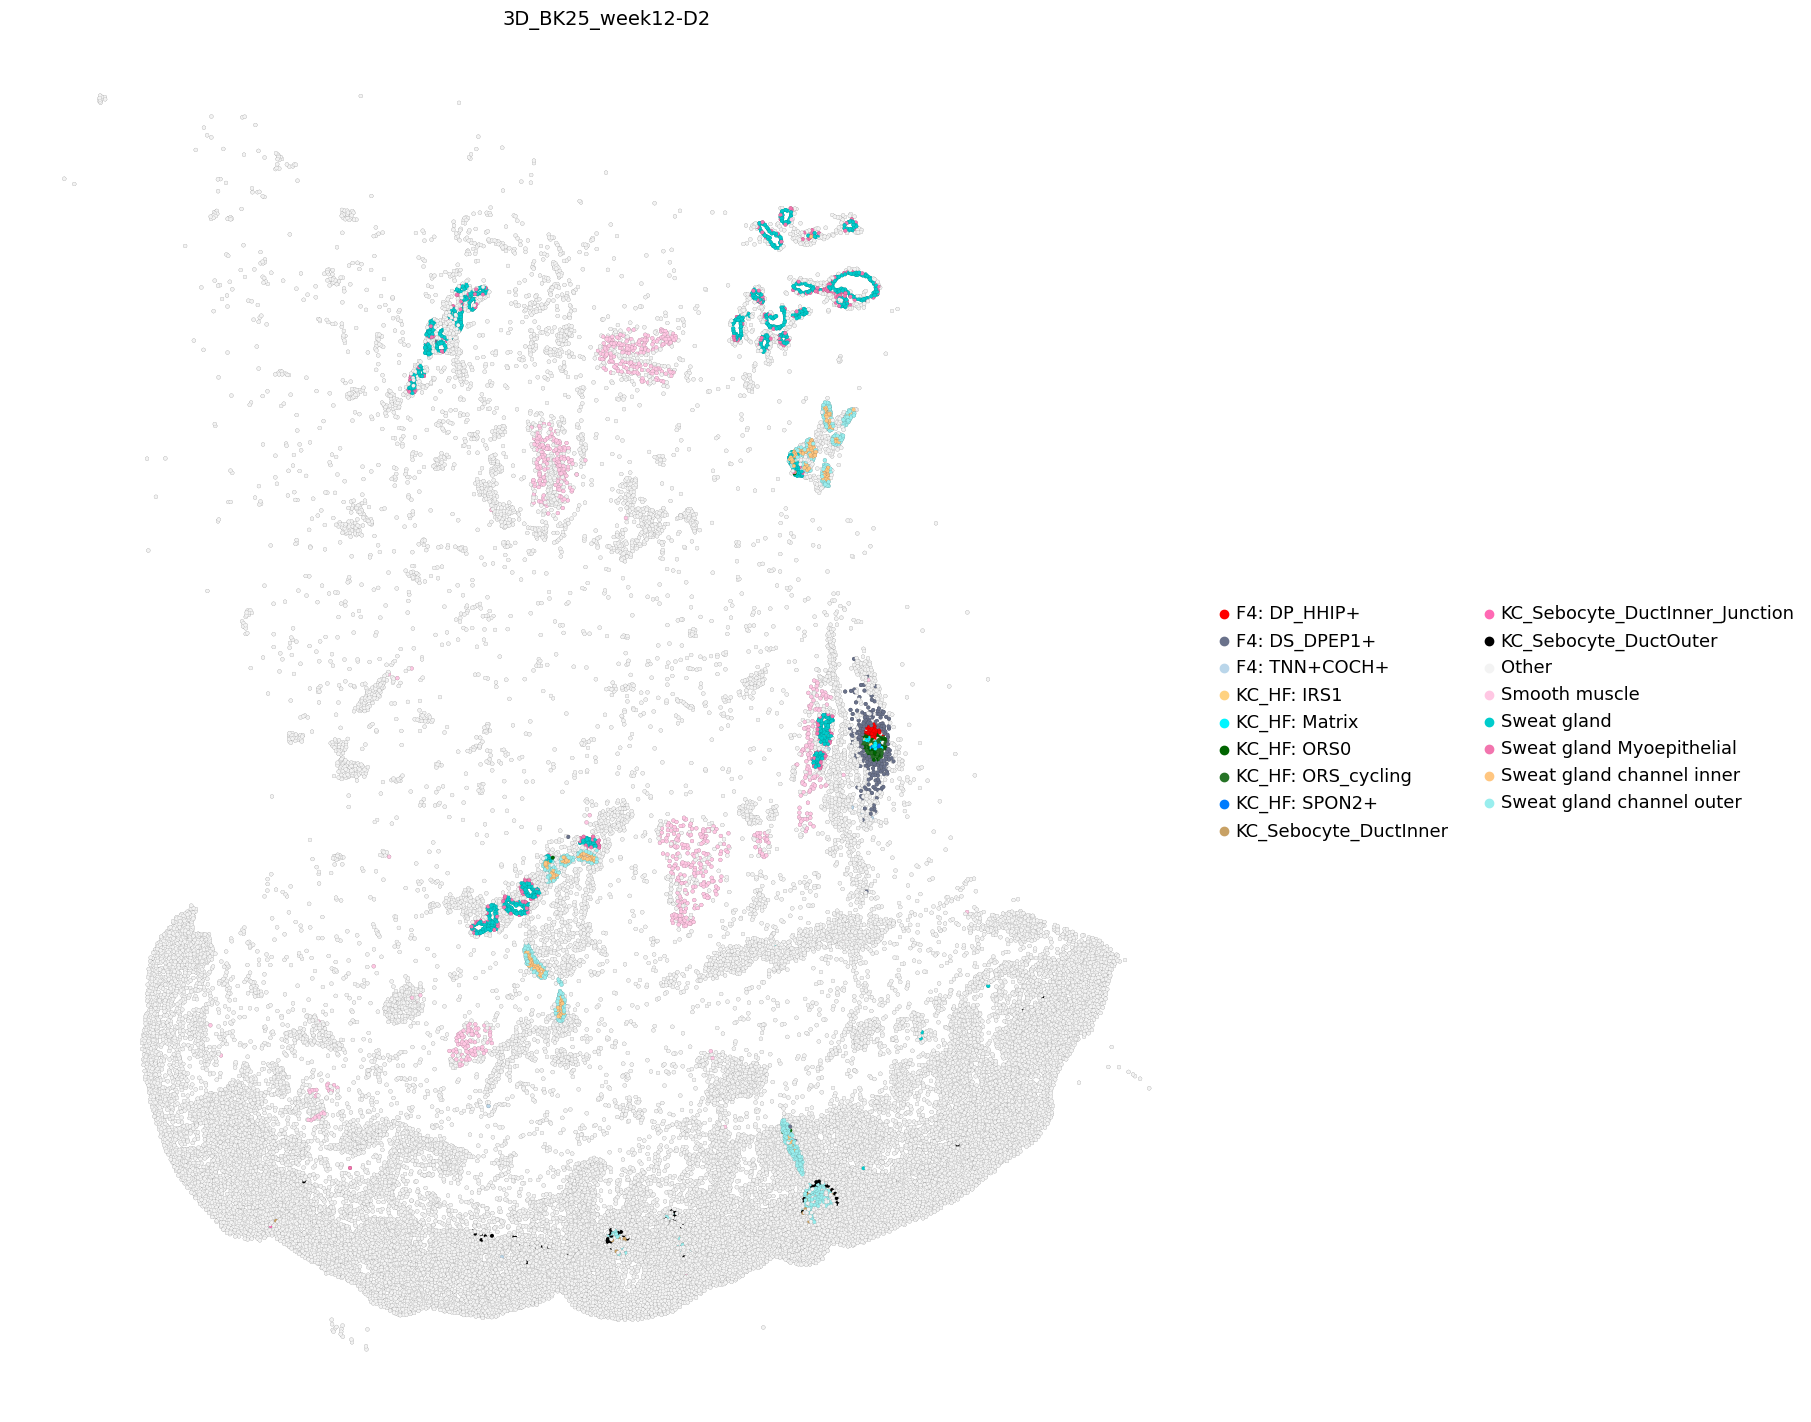

In [51]:
CELL_TYPE        ="F4: DP_HHIP+"#'KC_HF: IRS_Cuticle'# # 'KC_HF: ORS-Bulb/infundibulum'
MIN_CELL_COUNT   = 20

for sec in adata_5k.obs["info_id6"].unique():
    ad_i = adata_5k[adata_5k.obs["info_id6"] == sec]
    ad_i.obs["test"] = ad_i.obs["test"].astype("category")

    cat_order   = list(ad_i.obs["test"].cat.categories)
    palette_vec = [palette_dict.get(c, fallback) for c in cat_order]   # list, not dict
    ad_i.uns["test_colors"] = palette_vec
    if CELL_TYPE not in ad_i.obs["test"].unique():
        continue
    n = (ad_i.obs["test"] == CELL_TYPE).sum()
    if n < MIN_CELL_COUNT:
        continue

    #STATUS = ad_i.obs["Timepoint"].iloc[0]
    #tissue_section_id = ad_i.obs["info_id6"].iloc[0]
    #print(tissue_section_id)
    try:
        sq.pl.spatial_scatter(
                        ad_i,
                        library_id="spatial",
                        shape=None,
                        color="test",
                        size=30,
                        edgecolor="black",
                        linewidth=0.05,
                        vmax=1,
                        title=sec ,# "\n" + tissue_section_id,
                       # palette=cmap,

                        #ax=ax,
                        #legend_loc="on data"  # Disable the legend for each subplot
                )
    except:
        print("fail with: ", sec, n)

    
    

In [ ]:
kc_markers={         "KC_HF/sebocyte": [ "CYP27A1",  "IL11RA", "THBS2", "ABI3BP", "CDH13", "LGR6",],
 'Sebocyte': [ "GATA6",  "EMB",   'MGST1', "AR",
                 #"FST", "ANGPTL2",  
                ],
 'KC_Basal': ['COL17A1',    "TINAGL1",  "DLK2",  "CDH22" , "PTN", "DLL1",  'CDH22', "LGR6", ],
 #   "KRT9": ["KRT9"],
 #'KC2': ['BNC1', 'NOP14'],
#  #'KC_Int': ['MYCL', 'ALOX12', "CDSN",],
#  'KC4': ['KRT2', 'DSC1', 'IVL', 'SPINK5', 'KLK7',  "CNFN", "ALOX12", "SLC5A1" ,"SEPTIN5", "ZNF750", "CLDN23", "TJP3"
#          ],
#  'KC5': ["CDSN","ARG1",'FLG',"KLK5" , "KLK6",  "KPRP", 'LOR', 'PSORS1C2', 'LCE1B', "IL37",],
#      "KC6": ['SMPD3', 'CTSH',  "AQP9" ],
        
    
#  # 'DiseaseKC': ['S100A8',
 #  'S100A9',
 #  'KRT6A',
 #  'KRT6B',
 #  'KRT6C',
 #  'OAS1',  'SERPINB4','AKR1B10', "CLEC7A",# "TLR3", "TLR5", 
 #              # "STAT1", 'STAT2', 'IRF7',
 #               "CGAS", 
 #              ],

 

   
         'KC_Sebocyte_duct_outer': ["CCL19", "CCL27",#"CCL22",
                 #"VCAM1", "IRF1", "ITGB1", 
                                   ],
    
     'KC_Sebocyte_duct_inner': ['PTGS1', "SOX21", "A2ML1", "CDHR1", #"GATA6",
                                "SERPINB4", "LIPG", "CCDC61",  ],
            "Sebocyte_junction": ["CDSN", "BEAN1","KLK10", "ADGRB1", "TGM1", "SLC5A1", "OCLN", "CALB2",
                # "LGALSL",
                  "SMPD3",  "IL18","LIPG", "NFATC2", #"SERPINA3", 
                  "SH3BGRL2",
                 "MYO5B"],
# 'KC_Sebocyte_duct_outer_cycling': [''],
 #'KC_Sebocyte_duct_outer_inflamm': ['CFB', "VCAM1", "ADAM8", "JAK3", "MX1", "CXCR4", "CIITA", "STAT5A"],
            "PPARG+": [ 'PPARG',  "PPARA", "LRG1", "ACACB", "PC", 
                             "MAOA", "FADS1", "PM20D1",'GAL',  "FADS1", "FADS2", 'ALCAM',"PLIN4",
                      "PLIN5",  "KNSTRN", "HSD11B1",  "NR1H3", "CLSTN3",
                      ],
     'KC_Sebocyte_PPARG+_basal': [    "TGFBR3", "FZD4", "HSD11B1" ,  "NNAT", "CD14", "FAM107A",  "NNAT",],
 'KC_Sebocyte_PPARG+_inner': [  "PDZK1",  "DMBX1",
                              "CUX2", "ABTB2", "ADM", "CYP4F2", "SEC14L3", "SMPD3", "TNNT2",
                            "IGHE", "SPAG1", "CDA", "PADI4", "TBL1Y", "GCNT4", "GCKR", "KNDC1"
                             ],
#      'Channel_general': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
#                         ],
        
    

 #"Gland": [ ],
    "KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
   # "Merkel": ["ATOH1", "KRT20"],
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]
    "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
    
#     "IFN_RESPONSE":  ["OAS1", "OAS2", "OAS3", #"IFI27",
#                       "IFI6",  "IFI44",
#                 "MX1", #"NMI", 
#                       "XAF1", "IFI44L", "LTB4R2",
#                "TRIM22", "IFIT3", "APOL1", "IFIT1",
            
#                ] ,
}
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST
 
sc.pl.dotplot(ad_i, 
              remove_markers(kc_markers),
              groupby="test",
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,
#              categories_order = [  'KC_Sebocyte_duct_basal/outer', #'KC_Sebocyte_duct_outer_inflamm',
#  #'KC_Sebocyte_duct_outer_cycling',
#                                  'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_inner',
# ]
             
             )


In [ ]:
GENES = [x for x in ad_i.var_names if x.startswith("HSD")]
sc.pl.dotplot(ad_i, 
              remove_markers(GENES),
              groupby="test",
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,
#              categories_order = [  'KC_Sebocyte_duct_basal/outer', #'KC_Sebocyte_duct_outer_inflamm',
#  #'KC_Sebocyte_duct_outer_cycling',
#                                  'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_inner',
# ]
             
             )


In [ ]:
CELL_TYPE        ="KC_HF: IRS0"#'KC_HF: IRS_Cuticle'# # 'KC_HF: ORS-Bulb/infundibulum'
MIN_CELL_COUNT   = 10

for sec in adata_5k.obs["info_id6"].unique():
    ad_i = adata_5k[adata_5k.obs["info_id6"] == sec]
    if CELL_TYPE not in ad_i.obs["lvl5_annotation"].unique():
        continue
    n = (ad_i.obs["lvl5_annotation"] == CELL_TYPE).sum()
    if n < MIN_CELL_COUNT:
        continue

    STATUS = ad_i.obs["Timepoint"].iloc[0]
    tissue_section_id = ad_i.obs["info_id6"].iloc[0]
    print(tissue_section_id)
#    
    sq.pl.spatial_scatter(
                    ad_i,
                    library_id="spatial",
                    shape=None,
                    color="lvl5_annotation",
                    size=14,
                    edgecolor="black",
                    linewidth=0.03,
                    vmax=1,
                    title=STATUS ,#+ "\n" + tissue_section_id,
                   # palette=cmap,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )

    

In [ ]:
CELL_TYPE        ="KC_HF: IRS0"#'KC_HF: IRS_Cuticle'# # 'KC_HF: ORS-Bulb/infundibulum'
MIN_CELL_COUNT   = 4

for sec in adata_5k.obs["info_id6"].unique():
    print(sec)
    ad_i = adata_5k[adata_5k.obs["info_id6"] == sec]
    if CELL_TYPE not in ad_i.obs["lvl5_annotation"].unique():
        print('skip')
        continue
    n = (ad_i.obs["lvl5_annotation"] == CELL_TYPE).sum()
    print("found: ", n)
    if n < MIN_CELL_COUNT:
        print("below min count")
        continue

    STATUS = ad_i.obs["Timepoint"].iloc[0]
    tissue_section_id = ad_i.obs["info_id6"].iloc[0]
    print(tissue_section_id, ad_i.shape)
#    
    sc.pl.spatial(ad_i,
                    #library_id="spatial",
                    #shape=None,
                    color="lvl5_annotation",
                    spot_size=12,
                    edgecolor="black",
                    linewidth=0.03,
                    vmax=1,
                  
                    title=STATUS ,#+ "\n" + tissue_section_id,
                   # palette=cmap,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )

    

In [ ]:
CELL_TYPE        ="KC_HF: IRS1"#'KC_HF: IRS_Cuticle'# # 'KC_HF: ORS-Bulb/infundibulum'
MIN_CELL_COUNT   = 10

for sec in adata_5k.obs["info_id6"].unique():
    print(sec)
    ad_i = adata_5k[adata_5k.obs["info_id6"] == sec]
    if CELL_TYPE not in ad_i.obs["lvl5_annotation"].unique():
        print('skip')
        continue
    n = (ad_i.obs["lvl5_annotation"] == CELL_TYPE).sum()
    print("found: ", n)
    if n < MIN_CELL_COUNT:
        print("below min count")
        continue

    STATUS = ad_i.obs["Timepoint"].iloc[0]
    tissue_section_id = ad_i.obs["info_id6"].iloc[0]
    print(tissue_section_id, ad_i.shape)
#    
    sc.pl.spatial(ad_i,
                    #library_id="spatial",
                    #shape=None,
                    color="lvl5_annotation",
                    spot_size=10,
                    edgecolor="black",
                    linewidth=0.1,
                    vmax=1,
                    title=STATUS ,#+ "\n" + tissue_section_id,
                   # palette=cmap,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )

    